<a href="https://colab.research.google.com/github/DaniyolKim/dp2/blob/main/dp2_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from fbprophet import Prophet

# 1시간 주기

In [13]:
df_org = pd.read_csv('https://raw.githubusercontent.com/DaniyolKim/dp2/main/result.csv')
df_org = df_org.set_index(['Unnamed: 0'])
df_org

,elec,hum,rain_fall,rain_type,temp,wind_dir,wind_pwr
Unnamed: 0,,,,,,,
2019-01-01 00:00,3330.816,56.0,0.0,None,-4.7,65.0,1.1
2019-01-01 01:00,3339.200,50.0,0.0,None,-3.8,15.0,2.2
2019-01-01 02:00,3287.616,54.0,0.0,None,-2.8,348.0,2.9
2019-01-01 03:00,3287.040,51.0,0.0,None,-1.2,316.0,2.9
2019-01-01 04:00,3372.672,49.0,0.0,None,-0.5,286.0,3.3
...,...,...,...,...,...,...,...
2021-04-30 19:00,3604.800,97.0,0.0,None,10.0,292.0,0.5
2021-04-30 20:00,3458.944,98.0,0.0,None,9.9,272.0,1.0
2021-04-30 21:00,3335.808,98.0,0.0,None,10.3,267.0,1.0


In [ ]:
m = Prophet()
m.add_country_holidays(country_name='KR')

In [ ]:
df_1h = pd.DataFrame({'ds': pd.to_datetime(df_org.index), 'y': df_org['elec']})
m.fit(df_1h)
future = m.make_future_dataframe(periods=20424, freq='H')

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [ ]:
forecast = m.predict(future)

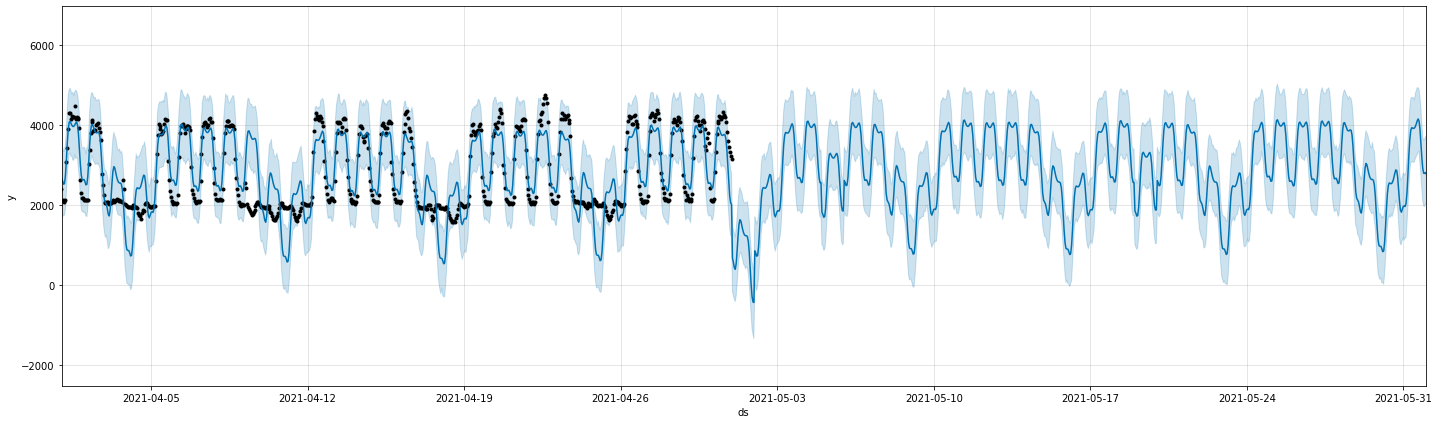

In [ ]:
m.plot(forecast, figsize=(20, 6))
from datetime import datetime
plt.xlim([datetime(2021, 4, 1), datetime(2021, 6, 1)])
plt.show()

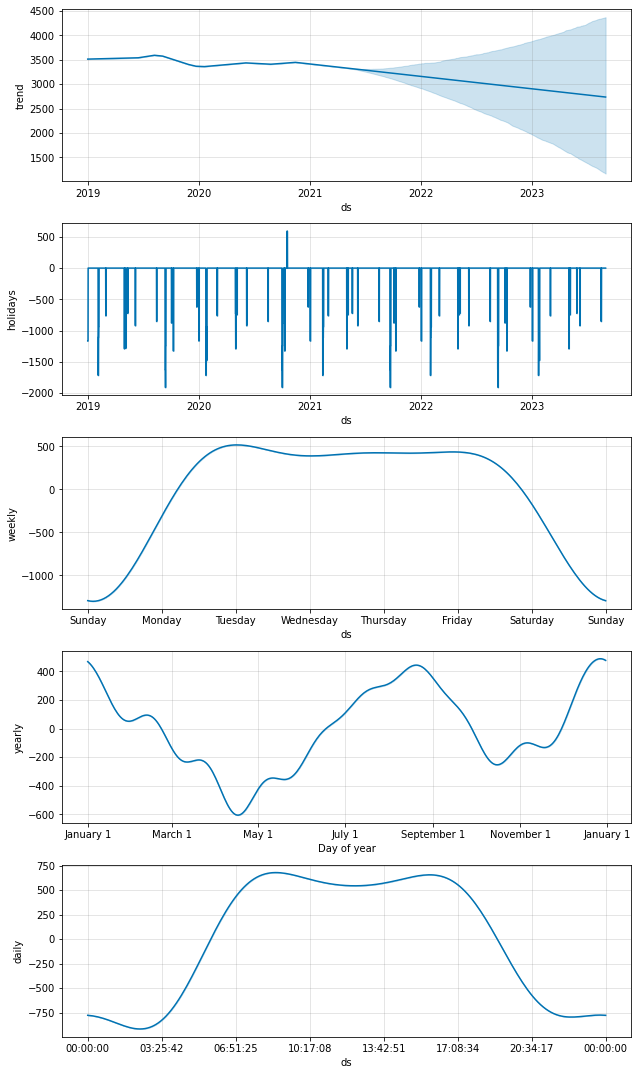

In [ ]:
fig2 = m.plot_components(forecast)

# 1일 주기

In [17]:
df_org2 = df_org.copy()
df_org2['time'] = pd.to_datetime(df_org2.index)
df_org2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20424 entries, 2019-01-01 00:00 to 2021-04-30 23:00
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   elec       20424 non-null  float64       
 1   hum        20424 non-null  float64       
 2   rain_fall  20424 non-null  float64       
 3   rain_type  20424 non-null  object        
 4   temp       20424 non-null  float64       
 5   wind_dir   20424 non-null  float64       
 6   wind_pwr   20424 non-null  float64       
 7   time       20424 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.4+ MB


In [18]:
df_group_day = df_org2.groupby(df_org2['time'].dt.to_period('1D')).mean()
df_group_day.describe()

,elec,hum,rain_fall,temp,wind_dir,wind_pwr
count,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000
mean,3384.776011,65.292058,0.125455,12.339204,191.743806,1.699508
std,776.348200,15.137269,0.452341,9.967350,55.073774,0.633608
min,1681.802667,21.416667,0.000000,-14.666667,40.791667,0.387500
25%,2646.922667,53.791667,0.000000,4.375000,154.708333,1.231250
50%,3580.882667,65.625000,0.000000,11.887500,189.250000,1.570833
75%,3984.201000,75.875000,0.000000,21.327083,227.250000,2.037500
max,5136.090833,98.791667,4.270833,31.912500,331.250000,4.504167


In [19]:
df_group_day.corr()

,elec,hum,rain_fall,temp,wind_dir,wind_pwr
elec,1.000000,0.080526,0.052718,0.018291,0.016364,-0.022129
hum,0.080526,1.000000,0.394400,0.440438,-0.184500,-0.243401
rain_fall,0.052718,0.394400,1.000000,0.223732,-0.131722,0.075476
temp,0.018291,0.440438,0.223732,1.000000,-0.288933,-0.185055
wind_dir,0.016364,-0.184500,-0.131722,-0.288933,1.000000,0.609487
wind_pwr,-0.022129,-0.243401,0.075476,-0.185055,0.609487,1.000000


In [20]:
df_org.corr()

,elec,hum,rain_fall,temp,wind_dir,wind_pwr
elec,1.000000,0.156892,0.009018,-0.029694,0.035511,-0.098186
hum,0.156892,1.000000,0.169042,0.127860,-0.255455,-0.454049
rain_fall,0.009018,0.169042,1.000000,0.083914,-0.024871,0.027396
temp,-0.029694,0.127860,0.083914,1.000000,-0.049754,0.030440
wind_dir,0.035511,-0.255455,-0.024871,-0.049754,1.000000,0.452306
wind_pwr,-0.098186,-0.454049,0.027396,0.030440,0.452306,1.000000


In [30]:
m = Prophet()
m.add_country_holidays(country_name='KR')

In [31]:
df_1d = pd.DataFrame({'ds': df_group_day.index.to_timestamp(), 'y': df_group_day['elec']})
df_1d = df_1d.reset_index()
df_1d = df_1d.drop(['time'], axis=1)
m.fit(df_1d)
future = m.make_future_dataframe(periods=851, freq='D')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [33]:
forecast = m.predict(future)

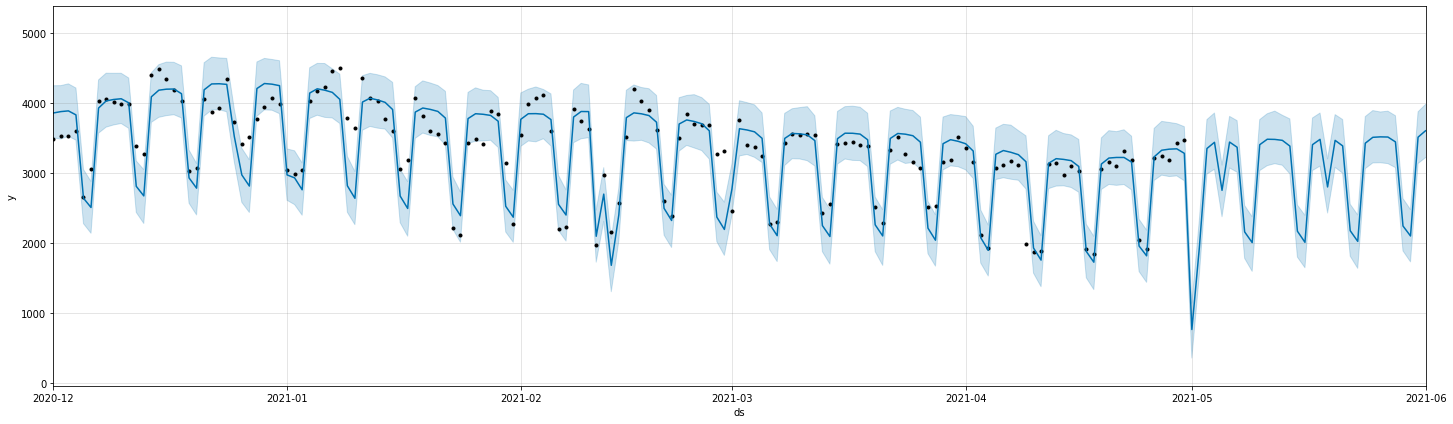

In [37]:
m.plot(forecast, figsize=(20, 6))
from datetime import datetime
plt.xlim([datetime(2020, 12, 1), datetime(2021, 6, 1)])
plt.show()

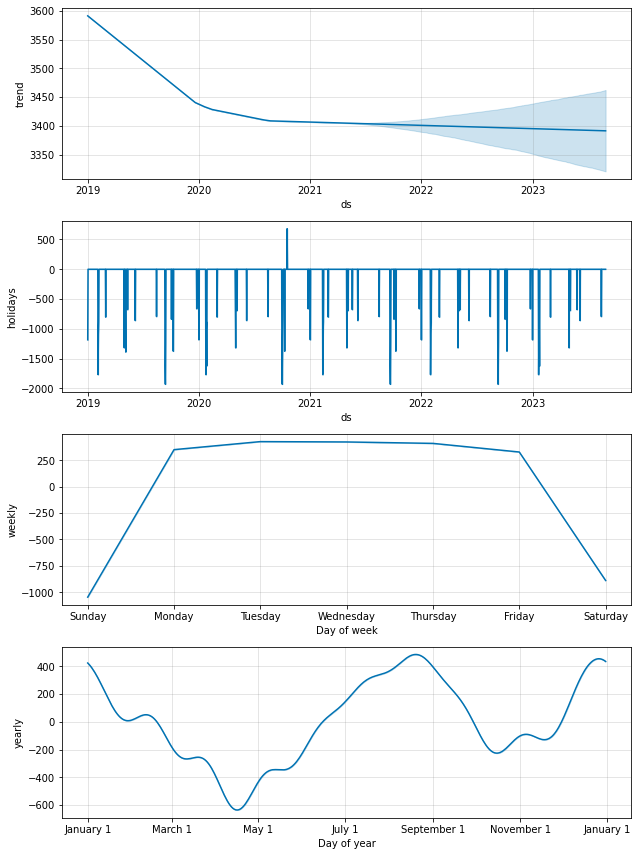

In [38]:
fig2 = m.plot_components(forecast)

In [39]:
m.train_holiday_names

0                                  New Year's Day
1       The day preceding of Lunar New Year's Day
2                            Lunar New Year's Day
3          The second day of Lunar New Year's Day
4                       Independence Movement Day
5                          Birthday of the Buddha
6                                  Children's Day
7           Alternative holiday of Children's Day
8                                      Labour Day
9                                    Memorial Day
10                                 Liberation Day
11                   The day preceding of Chuseok
12                                        Chuseok
13                      The second day of Chuseok
14                        National Foundation Day
15                                    Hangeul Day
16                                  Christmas Day
17                     Alternative public holiday
18    Alternative holiday of Lunar New Year's Day
dtype: object